In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm, datasets
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


plt.style.use("ggplot")

# <font face="gotham" color="purple"> Supervised vs Unsupervised Model </font>

Linear regression is the most common supervised models, you are using $X$ to supervise the prediction of $Y$. In contrast, unsupervised model doesn't rely on any extra information to make predictions, such classification.

# <font face="gotham" color="purple"> Overfitting </font>

How to overfit a model? Just use more parameters than necessary. Here is an example.

Too many parameters renders the model ridiculous for prediction.

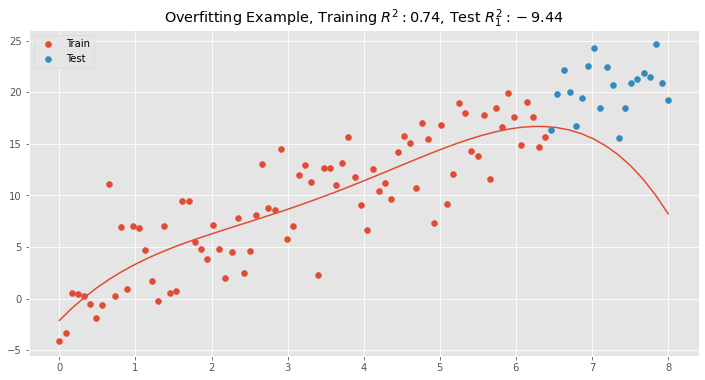

In [2]:
np.random.seed(12)


def overfitting_example(u=np.random.normal(0, 1, 100), poly_order=4):
    X = np.linspace(0, 8, 100)
    Y = 3 * X + u

    X_train, Y_train = X[:80], Y[:80]
    X_test, Y_test = X[80:], Y[80:]

    p4 = np.poly1d(np.polyfit(X_train, Y_train, poly_order))
    X_ax = np.linspace(0, 8)
    R_sqr_train = r2_score(Y_train, p4(X_train))
    R_sqr_test = r2_score(Y_test, p4(X_test))

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.scatter(X_train, Y_train, label="Train")
    ax.scatter(X_test, Y_test, label="Test")
    ax.plot(X_ax, p4(X_ax))
    ax.set_title(
        "Overfitting Example, Training $R^2:{:.2f}$, Test $R^2_1:{:.2f}$".format(
            R_sqr_train, R_sqr_test
        )
    )
    ax.legend()
    plt.show()


if __name__ == "__main__":
    overfitting_example(u=np.random.normal(0, 3, 100), poly_order=4)

# <font face="gotham" color="purple"> Classification </font>

## <font face="gotham" color="purple"> K-mean Clustering </font>

We will use artificial data to demonstrate the idea of K-mean clustering, two centroids will be generated.  

In [3]:
def gen_cluster_data(N, k):
    # N observations, k clusters
    points_per_cluster = N / k
    X = []
    for i in range(k):
        centroid_alpha = np.random.uniform(30, 50)
        centroid_beta = np.random.uniform(200, 250)
        for j in range(int(points_per_cluster)):
            X.append(
                [
                    np.random.normal(centroid_alpha, 50),
                    np.random.normal(centroid_beta, 40),
                ]
            )
    X = np.array(X)
    return X

In [4]:
N, k = 2000, 4
data_cluster = gen_cluster_data(N, k)
model = KMeans(n_clusters=k)
results = model.fit(
    scale(data_cluster)
)  # normalize the data for unitless interpretation

What we really need is stored in the ```labels_```, it helps us to color the plots too.

In [5]:
results.labels_

array([1, 1, 1, ..., 3, 2, 1])

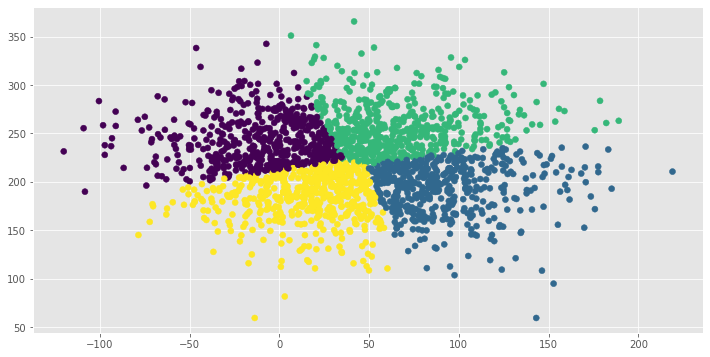

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(data_cluster[:, 0], data_cluster[:, 1], c=results.labels_)
plt.show()

## <font face="gotham" color="purple">Entropy </font>

The term **Entropy** measures the state of order in a data set, if the data has many different classes, the entropy will be high, vice verse low. 

The entropy is calculated by
$$
H(S)=-p_1 \ln p_1-\cdots-p_n \ln p_n
$$
$p_i$ represents the proportion of each lass.


## <font face="gotham" color="purple"> Support Vector Machine </font>

SVM is for classifying higher-dimensional data, mathematically support vectors can help defining hyperplane.

In [7]:
def gen_cluster_data(N, k):
    # N observations, k clusters
    points_per_cluster = N / k
    X, y = [], []
    for i in range(k):
        centroid_alpha = np.random.uniform(30, 80)
        centroid_beta = np.random.uniform(200, 250)
        for j in range(int(points_per_cluster)):
            X.append(
                [
                    np.random.normal(centroid_alpha, 3),
                    np.random.normal(centroid_beta, 3),
                ]
            )
            y.append(i)
    X = np.array(X)
    y = np.array(y)
    return X, y

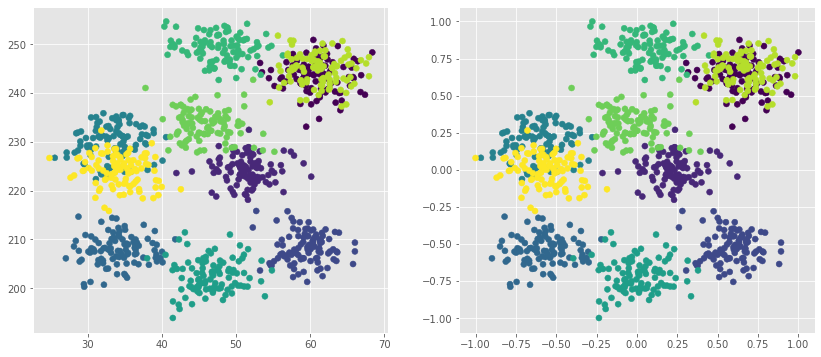

In [8]:
X, y = gen_cluster_data(1000, 10)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
ax[0].scatter(X[:, 0], X[:, 1], c=y)

results_scaled = MinMaxScaler(feature_range=(-1, 1)).fit(X)
X = results_scaled.transform(X)
ax[1].scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [9]:
svc = svm.SVC(kernel="linear").fit(X, y)

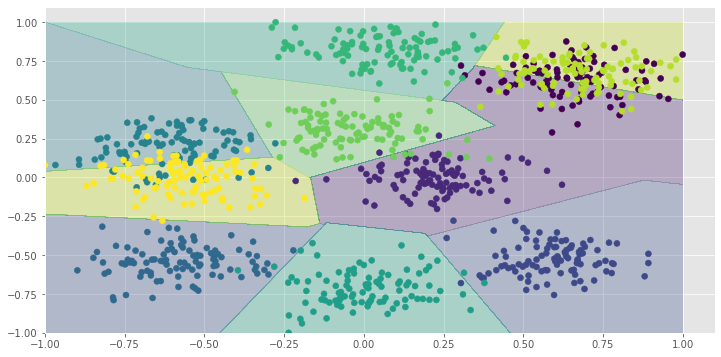

In [10]:
def plotPrediction(classifier):
    xx, yy = np.meshgrid(np.arange(-1, 1, 0.001), np.arange(-1, 1, 0.001))
    npx, npy = xx.ravel(), yy.ravel()
    sample_points = np.c_[npx, npy]  # concatenate
    Z = classifier.predict(sample_points)

    fig, ax = plt.subplots(figsize=(12, 6))
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()


if __name__ == "__main__":
    plotPrediction(svc)

# <font face="gotham" color="purple"> Principal Component Analysis </font>

PCA is a dimentionality reduction technique which extracts the most important information of data and reserve the variability as best as it can. 

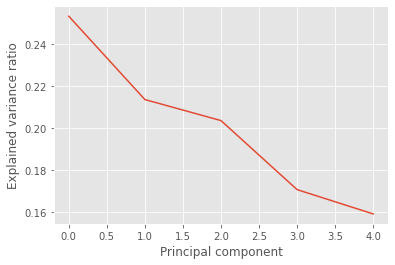

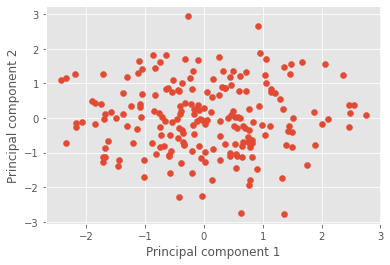

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Generate some random data
data = np.random.randn(200, 5)

# Perform PCA on the data
pca = PCA()
pca.fit(data)

# Get the explained variance ratio of each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Get the principal components of the data
principal_components = pca.transform(data)

# Plot the explained variance ratio of each principal component
plt.plot(explained_variance_ratio)
plt.xlabel("Principal component")
plt.ylabel("Explained variance ratio")
plt.show()

# Plot the first two principal components
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.show()

# <font face="gotham" color="purple"> Ridge and Lasso Regression </font>

This is the algorithm of the **ridge regression** seeks to minimize
$$
\sum_{i=1}^n\left(y_i-\beta_0-\sum_{j=1}^p \beta_j x_{i j}\right)^2+\lambda \sum_{j=1}^p \beta_j^2=\mathrm{RSS}+\lambda \sum_{j=1}^p \beta_j^2
$$
where $\lambda$ is a  _tuning parameter_. Note that _shrinking penalty_ does not include constant term $\beta_0$.

The motivation of using ridge over OLS is due to bias-variance trade-off. Ridge regression addresses overfitting by adding a regularization term to the objective function.

**Lasso regression** seeks to minimize
$$
\sum_{i=1}^n\left(y_i-\beta_0-\sum_{j=1}^p \beta_j x_{i j}\right)^2+\lambda \sum_{j=1}^p\left|\beta_j\right|=\operatorname{RSS}+\lambda \sum_{j=1}^p\left|\beta_j\right| .
$$

I suspected Lasso regression has a bug in Scikit, when running with linear regression object, lasso is showing a horizontal line.

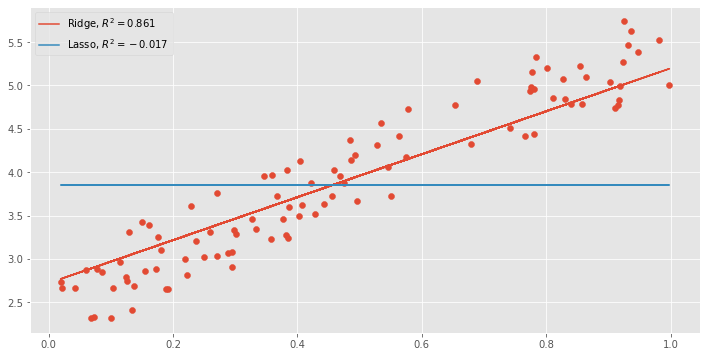

In [11]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

X = np.random.rand(100, 1)
y = 2 + 3 * X + np.random.rand(100, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# ols_model = LinearRegression()
ridge_model = Ridge(alpha=1.5)
lasso_model = Lasso(alpha=0.5)

# ols_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
# ols_predictions = ols_model.predict(X_test)
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)


# Evaluate the models' performance
# ols_r2 = ols_model.score(X_test, y_test)
ridge_r2 = ridge_model.score(X_test, y_test)
lasso_r2 = lasso_model.score(X_test, y_test)


# Plot the results
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(X, y)
# ax.plot(X, ols_model.predict(X), label='OLS, $R^2 = {:.3f}$'.format(ols_r2))
ax.plot(X, ridge_model.predict(X), label="Ridge, $R^2 = {:.3f}$".format(ridge_r2))
ax.plot(X, lasso_model.predict(X), label="Lasso, $R^2 = {:.3f}$".format(lasso_r2))
ax.legend()
plt.show()

## <font face="gotham" color="purple"> Elastic-Net Regression </font>

If you combine ridge and lasso regression, you obtain 
$$
\sum_{i=1}^n\left(y_i-\beta_0-\sum_{j=1}^p \beta_j x_{i j}\right)^2+\lambda \sum_{j=1}^p \beta_j^2=\mathrm{RSS}+\lambda_1 \sum_{j=1}^p \beta_j^2 + \lambda_2 \sum_{j=1}^p\left|\beta_j\right|
$$

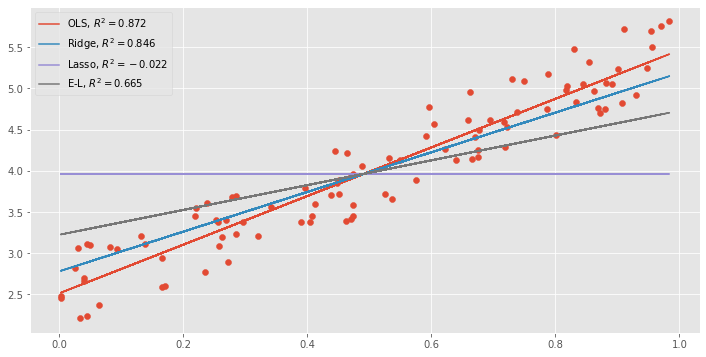

In [22]:
from sklearn.linear_model import ElasticNet

X = np.random.rand(100, 1)
y = 2 + 3 * X + np.random.rand(100, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ols_model = LinearRegression().fit(X_train, y_train)
ridge_model = Ridge(alpha=1.5).fit(X_train, y_train)
lasso_model = Lasso(alpha=0.5).fit(X_train, y_train)
enet_model = ElasticNet(alpha=0.1, l1_ratio=0.6).fit(X_train, y_train)


# Make predictions on the test set
ols_predictions = ols_model.predict(X_test)
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)
enet_predictions = lasso_model.predict(X_test)


# Evaluate the models' performance
ols_r2 = ols_model.score(X_test, y_test)
ridge_r2 = ridge_model.score(X_test, y_test)
lasso_r2 = lasso_model.score(X_test, y_test)
enet_r2 = enet_model.score(X_test, y_test)


# Plot the results
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(X, y)
ax.plot(X, ols_model.predict(X), label="OLS, $R^2 = {:.3f}$".format(ols_r2))
ax.plot(X, ridge_model.predict(X), label="Ridge, $R^2 = {:.3f}$".format(ridge_r2))
ax.plot(X, lasso_model.predict(X), label="Lasso, $R^2 = {:.3f}$".format(lasso_r2))
ax.plot(X, enet_model.predict(X), label="E-L, $R^2 = {:.3f}$".format(enet_r2))
ax.legend()
plt.show()

# <font face="gotham" color="purple"> K-Nearest Neighbors </font>

Test accuracy: 0.72


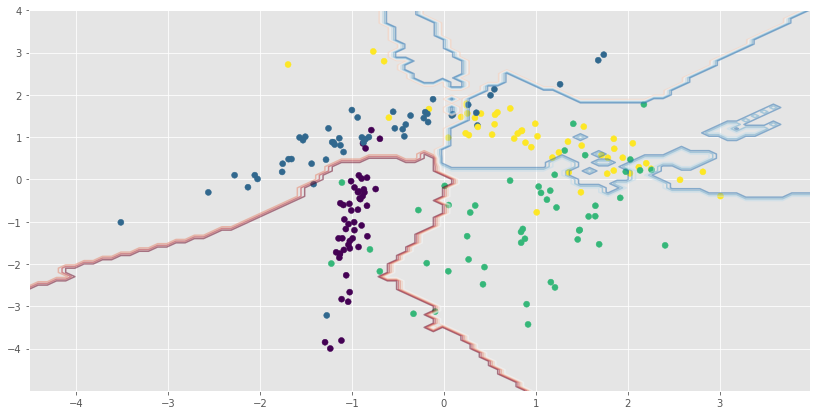

In [49]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

# Generate some random data
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    n_classes=4,
    random_state=1,
)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create a k-NN classifier
knn = KNeighborsClassifier(n_neighbors=6)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Test the classifier on the test data
accuracy = knn.score(X_test, y_test)
print(f"Test accuracy: {accuracy:.2f}")

# Plot the data
fig, ax = plt.subplots(figsize=(14, 7))
ax.scatter(X[:, 0], X[:, 1], c=y)

# Define a grid of points to classify
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Classify the points on the grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Plot the decision boundary
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, cmap="RdBu", alpha=0.5)
plt.show()